## DDA3020 Autumn 2023 Homework 1

### Programming Part 1：Polynomial Regression

--------------------------------------------------------------------------------------------------------------------------

In this exercise, we will try to fit a non-linear function $g$ with polynomial regression on the feasible space $\mathbf{X} = [0,11]$:
$$\text{Unknown} \quad g(x) = ?$$
$$\text{Construct} \quad f(x) = \sum_{i=0}^n \alpha_i x^i \quad \Longleftrightarrow \quad f(x) = w^Tx',\quad x' = \begin{bmatrix} 1\\x\\x^2\\\vdots\\x^n\end{bmatrix},\quad s.t. \quad \forall x\in \mathbf{X}, \quad f(x) \approx g(x) $$
Where $n$ is the polynomial degree of freedom and is manually chosen.

--------------------------------------------------------------------------------------------------------------------------

In [1]:
!pip install numpy
!pip install matplotlib



In [2]:
import numpy as np
import matplotlib.pyplot as plt


We will use 17 noised samples to try to construct $f$.

In [3]:
x = np.array([ 0.    ,  0.6875,  1.375 ,  2.0625,  2.75  ,  3.4375,  4.125 , 4.8125,  5.5   ,  6.1875,  6.875 ,  7.5625,  8.25  ,  8.9375, 9.625 , 10.3125, 11.    ])
y = np.array([ -4.4282,   5.3943,   1.2416,  -5.9952,   3.1727,  18.6035, -3.2577,  -4.3593, -14.3989, -41.4483, -41.7916, -16.6214, 33.3262,  66.5037,  87.59  ,  64.3216,  10.4986])

#### 1. (1 point)

(1) Define the function to calculate $\hat{w}$ directly from $X$, $y$ and $\lambda$:

$$\hat{w} = \arg\min_{w}\|Xw-y\|^2+\lambda\|w\|^2 \quad \Rightarrow\quad \hat{w} = (X^TX+\lambda I)^{-1}X^Ty$$

   - _Hint_: You are allowed to use _np.linalg.inv_ to calculate the inverse of a matrix.


In [4]:
def estimate_w(X, y, lambda_reg):
    # Calculate X transpose
    X_transpose = X.T

    # Calculate X transpose times X
    X_transpose_X = X_transpose @ X

    # Calculate the regularization term
    regularization_term = lambda_reg * np.identity(X.shape[1])

    # Calculate the sum of X transpose times X and the regularization term
    sum_term = X_transpose_X + regularization_term

    # Calculate the inverse of the sum
    sum_inverse = np.linalg.inv(sum_term)

    # Calculate the final estimated weights w_hat
    w_hat = sum_inverse @ X_transpose @ y

    return w_hat

#### 2. (3 points)
(1) Take $n = 3$ and $lambda = 0$. Solve the problem.

(2) Display your $\hat{y} = X\hat{w}$ as well as the given $y$. You are supposed to see:

<!-- ![pic1](hw1.png) -->
<img src = 'hw1.png' width = 40% height = 40% />


 - _Hint_: the mean squared error of this solution $\frac{(\hat{y}-y)^2}{50} = 754.55$

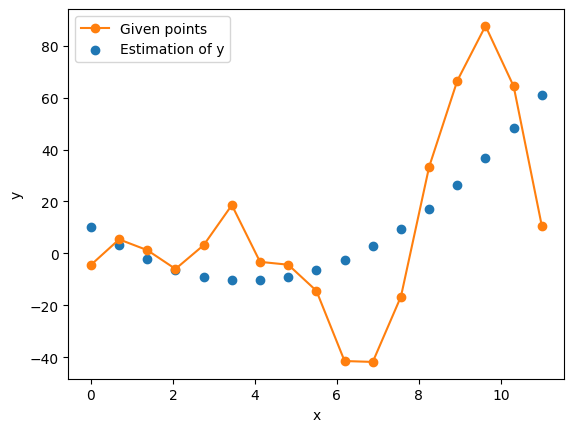

In [5]:
n = 3
lambda_reg = 0.0
X = np.column_stack([x ** i for i in range(n + 1)])
w_hat = estimate_w(X, y, lambda_reg)
y_hat = X @ w_hat

plt.plot(x, y, label='Given points', color='C1', marker='o')
plt.scatter(x, y_hat, label='Estimation of y', color='C0', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### 3. (8 points)

(1) Implement a grid search by changing the polynomial degree $n$ as well as the regularization parameter $\lambda$

(2) find the best mse (mean squared error) that you can reach. Print your best search mse.

In [6]:

# Define a range of values for n and lambda to search
n_values = [1, 2, 4, 8, 12, 13]  # Adjust as needed
lambda_values = [0.1, 1.0, 10.0]  # Adjust as needed

best_mse = float('inf')  # Initialize with a large value

# Initialize variables to store the best n and lambda
best_n = None
best_lambda = None

# Initialize a list to store MSE values for each combination
mse_values = []

# Iterate over n and lambda values
for n in n_values:
    for lambda_reg in lambda_values:
        # Create the X matrix based on the current n
        X = np.column_stack([x ** i for i in range(n + 1)])

        # Use your estimate_w function to estimate w_hat
        w_hat = estimate_w(X, y, lambda_reg)

        # Calculate y_hat
        y_hat = X @ w_hat

        # Calculate MSE
        mse = np.mean((y_hat - y) ** 2)

        # Append the MSE value to the list
        mse_values.append(mse)

        # Print the MSE for this combination
        print(f"n = {n}, lambda = {lambda_reg}, MSE = {mse}")

        # Check if this combination has a better MSE
        if mse < best_mse:
            best_mse = mse
            best_n = n
            best_lambda = lambda_reg

# Print the best MSE and corresponding n and lambda
print(f"Best MSE = {best_mse} for n = {best_n} and lambda = {best_lambda}")

n = 1, lambda = 0.1, MSE = 951.2561018607965
n = 1, lambda = 1.0, MSE = 953.7036311603619
n = 1, lambda = 10.0, MSE = 987.4375663657113
n = 2, lambda = 0.1, MSE = 754.6215019722566
n = 2, lambda = 1.0, MSE = 756.7794061755355
n = 2, lambda = 10.0, MSE = 772.2705882965822
n = 4, lambda = 0.1, MSE = 408.9359893926674
n = 4, lambda = 1.0, MSE = 477.8979014787205
n = 4, lambda = 10.0, MSE = 598.6333629710879
n = 8, lambda = 0.1, MSE = 26.030676541194747
n = 8, lambda = 1.0, MSE = 28.18437232121577
n = 8, lambda = 10.0, MSE = 32.8894031102957
n = 12, lambda = 0.1, MSE = 33.57977677777774
n = 12, lambda = 1.0, MSE = 32.37779921191011
n = 12, lambda = 10.0, MSE = 25.31407161780964
n = 13, lambda = 0.1, MSE = 7146.6337542904585
n = 13, lambda = 1.0, MSE = 360.4618262739678
n = 13, lambda = 10.0, MSE = 84.45007966279091
Best MSE = 25.31407161780964 for n = 12 and lambda = 10.0


#### 4. (1 point)

(1) Display in 3D the results of your grid search.

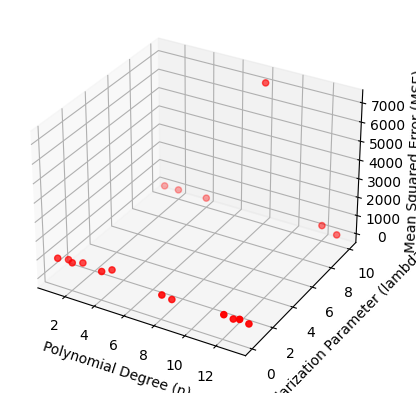

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a meshgrid of n and lambda values for 3D plotting
n_mesh, lambda_mesh = np.meshgrid(n_values, lambda_values)

# Convert n_mesh and lambda_mesh to 1D arrays
n_values_1d = n_mesh.flatten()
lambda_values_1d = lambda_mesh.flatten()
mse_values_1d = np.array(mse_values).flatten()

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(n_values_1d, lambda_values_1d, mse_values_1d, c='r', marker='o')

ax.set_xlabel('Polynomial Degree (n)')
ax.set_ylabel('Regularization Parameter (lambda)')
ax.set_zlabel('Mean Squared Error (MSE)')

plt.show()

#### 5. (1 point)

(1) Define the function $f$ that you found.


In [8]:
def f(x):
    # Create the X matrix based on the polynomial degree
    X = np.column_stack([x ** i for i in range(len(w_hat))])

    # Calculate f(x) using the polynomial coefficients w_hat
    f_x = X @ w_hat

    return f_x

#### 5. (6 points)

(1) Load the 1000 points taken from the ground truth fuction $g$. You will find data on the range $x\in[-5,20]$.

(2) Display for $x\in [0,11]$:
 - Display $g$ in color 'C0' with the points that you loaded.
 - Scatter the given 17 samples in color 'C1'.
 - Display (enough densely) your $f$ in color 'C2'.
 - Display the legend indicating the 3 plots. Specify the name for axis x and y.

(3) Repeat (2) for $x\in [-1,12]$

(4) Repeat (2) for $x\in [-2,13]$

(5) Give some comments on this work.

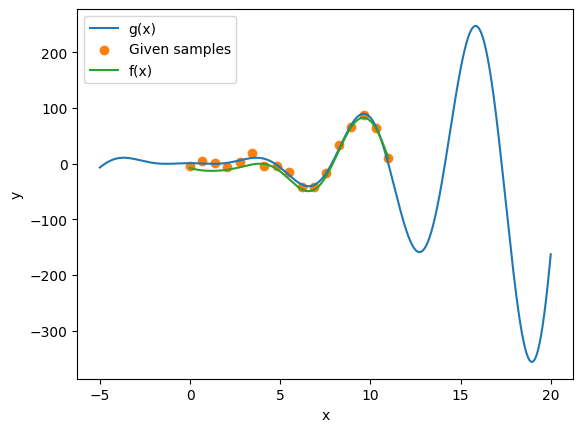

In [9]:
# load
import pickle as pkl
with open('ground truth function', 'rb') as f:
    x_real_g, y_real_g = pkl.load(f)
    f.close()

# Define the input range for visualization
x_range = np.linspace(0, 11, 1000)  # Adjust the range as needed

# Calculate the values of f(x) for the entire range
X_range = np.column_stack([x_range ** i for i in range(len(w_hat))])
f_values = X_range @ w_hat

# Plot the ground truth g(x) in blue
plt.plot(x_real_g, y_real_g, label='g(x)', color='C0')

# Scatter the given 17 samples in orange
plt.scatter(x, y, label='Given samples', color='C1')

# Plot the polynomial regression approximation f(x) in green
plt.plot(x_range, f_values, label='f(x)', color='C2')

# Set axis labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Display the plot
plt.show()

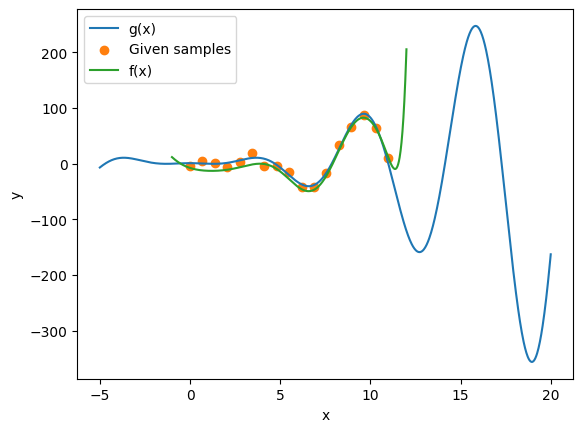

In [10]:
x_range = np.linspace(-1, 12, 1000)  # Updated range

# Calculate the values of f(x) for the entire range
X_range = np.column_stack([x_range ** i for i in range(len(w_hat))])
f_values = X_range @ w_hat

# Plot the ground truth g(x) in blue
plt.plot(x_real_g, y_real_g, label='g(x)', color='C0')

# Scatter the given 17 samples in orange
plt.scatter(x, y, label='Given samples', color='C1')

# Plot the polynomial regression approximation f(x) in green using the new x_range
plt.plot(x_range, f_values, label='f(x)', color='C2')

# Set axis labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Display the plot
plt.show()


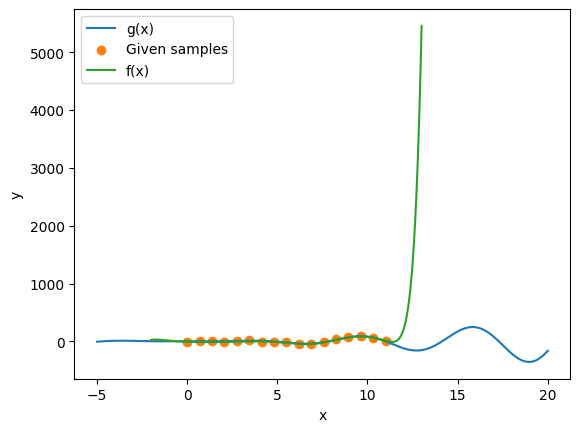

In [11]:
x_range = np.linspace(-2, 13, 1000)  # Updated range

# Calculate the values of f(x) for the entire range
X_range = np.column_stack([x_range ** i for i in range(len(w_hat))])
f_values = X_range @ w_hat

# Plot the ground truth g(x) in blue
plt.plot(x_real_g, y_real_g, label='g(x)', color='C0')

# Scatter the given 17 samples in orange
plt.scatter(x, y, label='Given samples', color='C1')

# Plot the polynomial regression approximation f(x) in green using the new x_range
plt.plot(x_range, f_values, label='f(x)', color='C2')

# Set axis labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Display the plot
plt.show()


comments:
- Extrapolation vs. Interpolation: In polynomial regression, we face a trade-off between interpolation (estimating data points within the given range) and extrapolation (predicting outside that range). Interpolation works well with polynomial regression, but extrapolation can lead to less reliable predictions which happened in this case as the range of x increases beyond the range of the given data set of x and y. Extrapolation risks overfitting which shows the result in erratic predictions when extrapolating beyond the data range.
- Limited Generalization: High-degree polynomial regression models tend to fit training data very closely, making them suitable for interpolation but limiting generalization.
